# Pymaceuticals Inc.
---


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt # imports the matplotlib module
import pandas as pd # imports the pandas library
import scipy.stats as st # imports the SciPy module from the SciPy library
import numpy as np
from scipy.stats import linregress

# Study data files
# Link to the data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID") # merges the data with "Mouse ID" as the common denominator/key

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = combined_data["Mouse ID"].nunique()

number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
unique_mouse_count = combined_data[["Mouse ID", "Timepoint"]].nunique()


# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_1 = combined_data.loc[combined_data.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

duplicate_mouse_1

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"], keep=False)]

duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.loc[combined_data["Mouse ID"] != "g989"]

clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data_num = clean_data["Mouse ID"].nunique()

clean_data_num

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_data.groupby("Drug Regimen") ["Tumor Volume (mm3)"].var()
standard_deviation = clean_data.groupby("Drug Regimen") ["Tumor Volume (mm3)"].std()
SEM = clean_data.groupby("Drug Regimen") ["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.

summary_statistics = pd.DataFrame ({
    
    "Mean of Tumor Value (mm3)": mean,
    "Median of Tumor Value (mm3)": median,
    "Variance of Tumor Value (mm3)": variance,
    "Standard Deviation of Tumor Value (mm3)": standard_deviation,
    "SEM of Tumor Value (mm3)": SEM
})

summary_statistics



,Mean of Tumor Value (mm3),Median of Tumor Value (mm3),Variance of Tumor Value (mm3),Standard Deviation of Tumor Value (mm3),SEM of Tumor Value (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

# I would say that the word "advanced" here is misused, this is "cleaner" rather than more "advanced"
summary_statistics_refined = clean_data.groupby("Drug Regimen") ["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

summary_statistics_refined




,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Total Number of Mice per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Mice'>

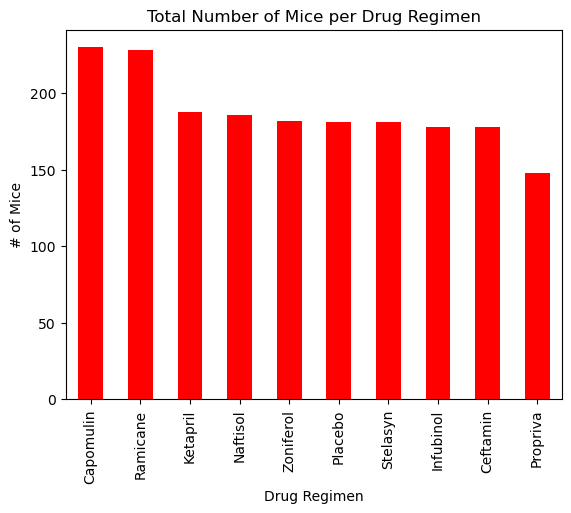

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

count_of_mice = clean_data["Drug Regimen"].value_counts()

pandas_bar_plot = count_of_mice.plot.bar(color='r')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")
plt.title("Total Number of Mice per Drug Regimen")

pandas_bar_plot

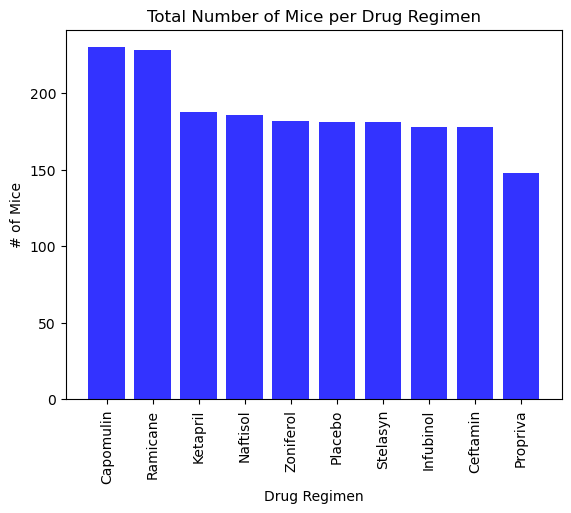

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = count_of_mice.index.values
y_axis = count_of_mice.values

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

plt.title("Total Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")
plt.xticks(rotation="vertical")

plt.show()

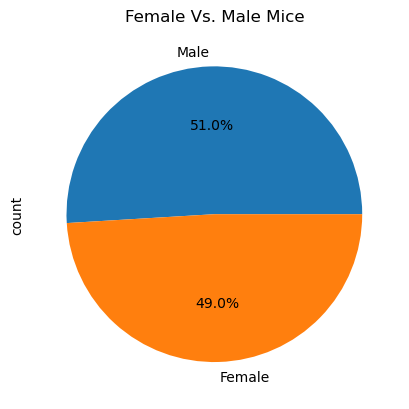

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fem_vs_male_data = clean_data["Sex"].value_counts()


plt.title("Female Vs. Male Mice")
fem_vs_male_data.plot.pie(autopct="%1.1f%%")
plt.show()

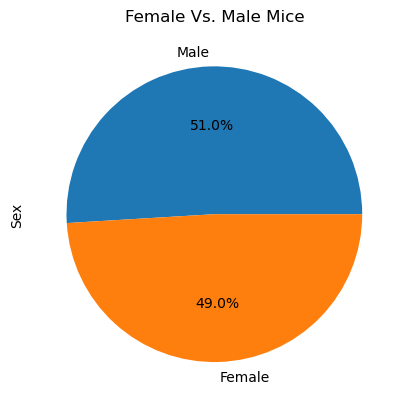

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [49.7999197, 50.200803]
plot = fem_vs_male_data.plot.pie(y="Total Count", autopct="%1.1f%%")

plt.title("Female Vs. Male Mice")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Merge this group dataframe with the original dataframe to get the tumor volume at the last timepoint

list_of_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_data[combined_data["Drug Regimen"].isin(list_of_drugs)]
drugs.head()


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
# Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in list_of_drugs:
    
    print(drug)


Capomulin
Ramicane
Infubinol
Ceftamin


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset   
# Determine outliers using upper and lower bounds

def calculate_and_print_summary(list_of_drugs, data):
    for drug in list_of_drugs:
        quartiles = data[drug].quantile([.25, .5, .75]).round(2)
        lowerq, median, upperq = quartiles[0.25], quartiles[0.5], quartiles[0.75]
        iqr = round(upperq - lowerq, 2)
        lower_bound = round(lowerq - 1.5 * iqr, 2)
        upper_bound = round(upperq + 1.5 * iqr, 2)

        print(f"------------------------------------------------------------")
        print(f"The lower quartile of {drug} treatments is: {lowerq}")
        print(f"The upper quartile of {drug} treatments is: {upperq}")
        print(f"The interquartile range of {drug} treatments is: {iqr}")
        print(f"Values below {lower_bound} could be {drug} outliers.")
        print(f"Values above {upper_bound} could be {drug} outliers.")
        print(f"------------------------------------------------------------")



calculate_and_print_summary(list_of_drugs, last_timepoint)


------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 

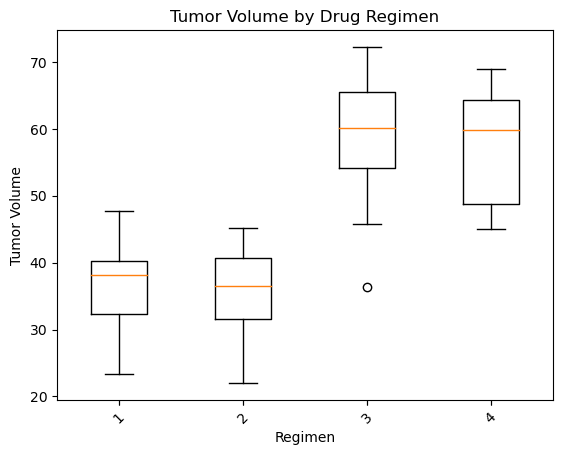

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

def generate_boxplot(list_of_drugs, data, xlabel="Regimen", ylabel="Tumor Volume", title="Tumor Volume by Drug Regimen"):
    boxplot_list = [list(data[drug].dropna()) for drug in list_of_drugs]

    fig, ax = plt.subplots()
    ax.set_xlabel(xlabel)
    ax.set_xticks(range(1, len(list_of_drugs) + 1))
    ax.set_xticklabels(list_of_drugs, rotation=45)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.boxplot(boxplot_list)
    plt.show()


generate_boxplot(list_of_drugs, last_timepoint)


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

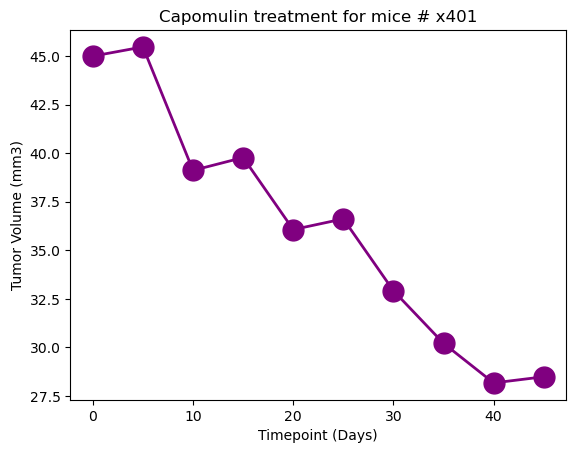

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

    
capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]

line_plot_for_mouse = capomulin_data.loc[capomulin_data["Mouse ID"] == "x401",:]
line_plot_for_mouse.head()
x_axis = line_plot_for_mouse["Timepoint"]
tumsiz = line_plot_for_mouse["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title("Capomulin treatment for mice # x401")
plt.plot(x_axis, tumsiz, linewidth=2, markersize=15, marker="o", color="purple", label="Fahreneit")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")



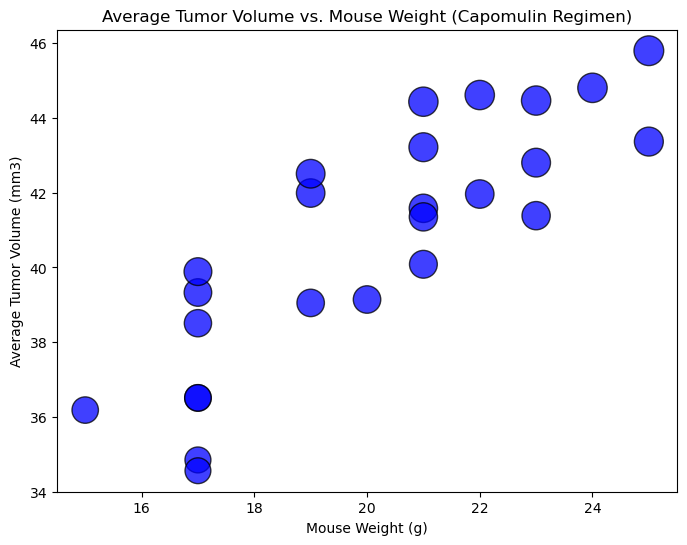

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Filter data for Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

# Calculate average tumor volume and mouse weight for each mouse
average_values_capomulin = capomulin_data.groupby("Mouse ID").agg({
    "Tumor Volume (mm3)": "mean",
    "Weight (g)": "mean"
})

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(
    average_values_capomulin["Weight (g)"],
    average_values_capomulin["Tumor Volume (mm3)"],
    marker="o",
    facecolors="blue",
    edgecolors="black",
    s=average_values_capomulin["Tumor Volume (mm3)"] * 10,  # Scale marker size based on tumor volume
    alpha=0.75
)

# Add labels and title
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show plot
plt.show()


## Correlation and Regression

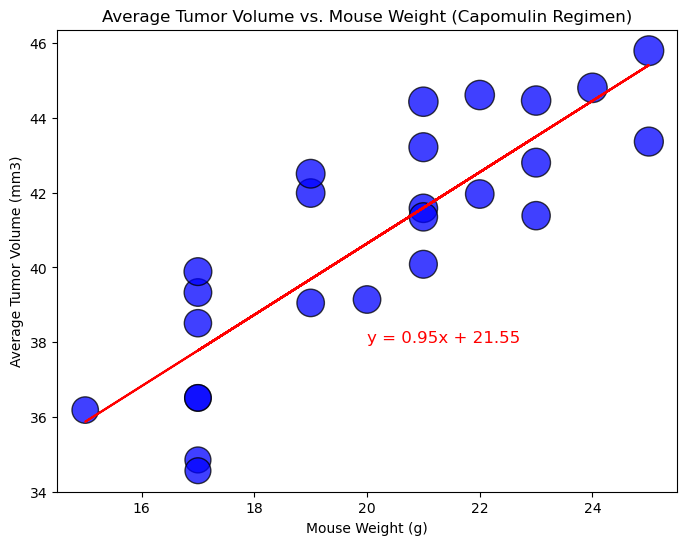

Correlation Coefficient: 0.84


In [18]:
# Calculate the correlation and regression model for mouse weight and average tumor volume for the Capomulin regimen
# Add the linear regression equation and line to plot
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Calculate correlation coefficient and linear regression model for Capomulin regimen
correlation_coefficient = st.pearsonr(average_values_capomulin["Weight (g)"], average_values_capomulin["Tumor Volume (mm3)"])
slope, intercept, r_value, p_value, std_err = linregress(
    average_values_capomulin["Weight (g)"],
    average_values_capomulin["Tumor Volume (mm3)"]
)

# Scatter plot with linear regression line
plt.figure(figsize=(8, 6))
plt.scatter(
    average_values_capomulin["Weight (g)"],
    average_values_capomulin["Tumor Volume (mm3)"],
    marker="o",
    facecolors="blue",
    edgecolors="black",
    s=average_values_capomulin["Tumor Volume (mm3)"] * 10,
    alpha=0.75
)

# Linear regression line
regression_line = slope * average_values_capomulin["Weight (g)"] + intercept
plt.plot(average_values_capomulin["Weight (g)"], regression_line, color='red')

# Add labels and title
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Add linear regression equation to plot
equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(equation, (20, 38), fontsize=12, color="red")

# Show plot
plt.show()

# Display correlation coefficient
print(f"Correlation Coefficient: {round(correlation_coefficient[0], 2)}")
